In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

In [15]:
 #1. Loading and Preprocessing the Image Data
# ------------------------------------------------
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

# Reshape the data to include a channel dimension (28x28 images with 1 channel)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize the pixel values to be in the range of 0 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Print the shape of the datasets
print("Shape of X_train:", x_train.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of Y_test:", y_test.shape)


Shape of X_train: (60000, 28, 28, 1)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of Y_test: (10000,)


In [9]:
# 2. Defining the Model Architecture
# ------------------------------------------------
# Create a Sequential model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes in Fashion MNIST, so output layer has 10 units
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\bhale\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# 3. Training the Model
# ------------------------------------------------
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.6241 - loss: 0.9966 - val_accuracy: 0.8227 - val_loss: 0.4649
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8126 - loss: 0.5083 - val_accuracy: 0.8552 - val_loss: 0.3881
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8367 - loss: 0.4386 - val_accuracy: 0.8750 - val_loss: 0.3409
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8557 - loss: 0.3967 - val_accuracy: 0.8804 - val_loss: 0.3197
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8621 - loss: 0.3742 - val_accuracy: 0.8846 - val_loss: 0.3140
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8684 - loss: 0.3572 - val_accuracy: 0.8878 - val_loss: 0.3011
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8736 - loss: 0.3390 - val_accuracy: 0.8803 - val_loss: 0.3055
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8759 -

313/313 - 2s - 6ms/step - accuracy: 0.8901 - loss: 0.2861
Test Accuracy: 89.01%


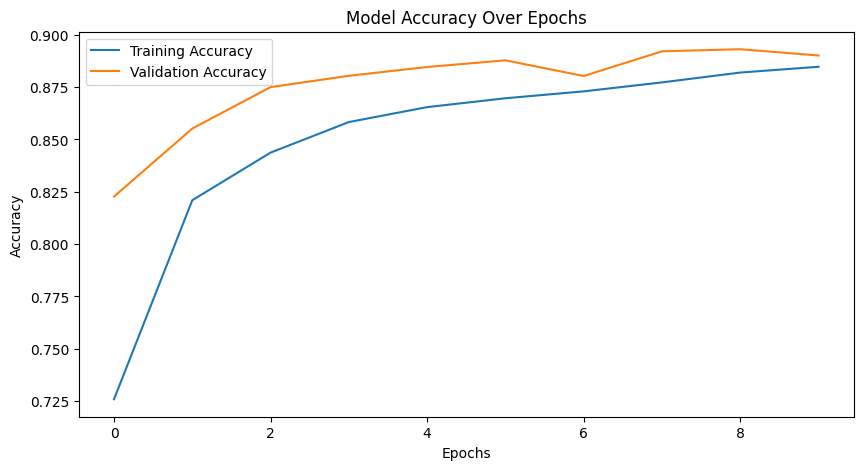

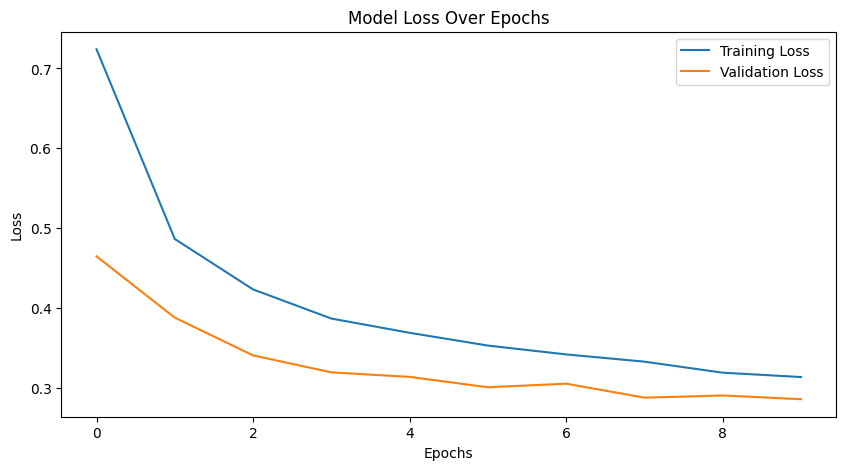

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


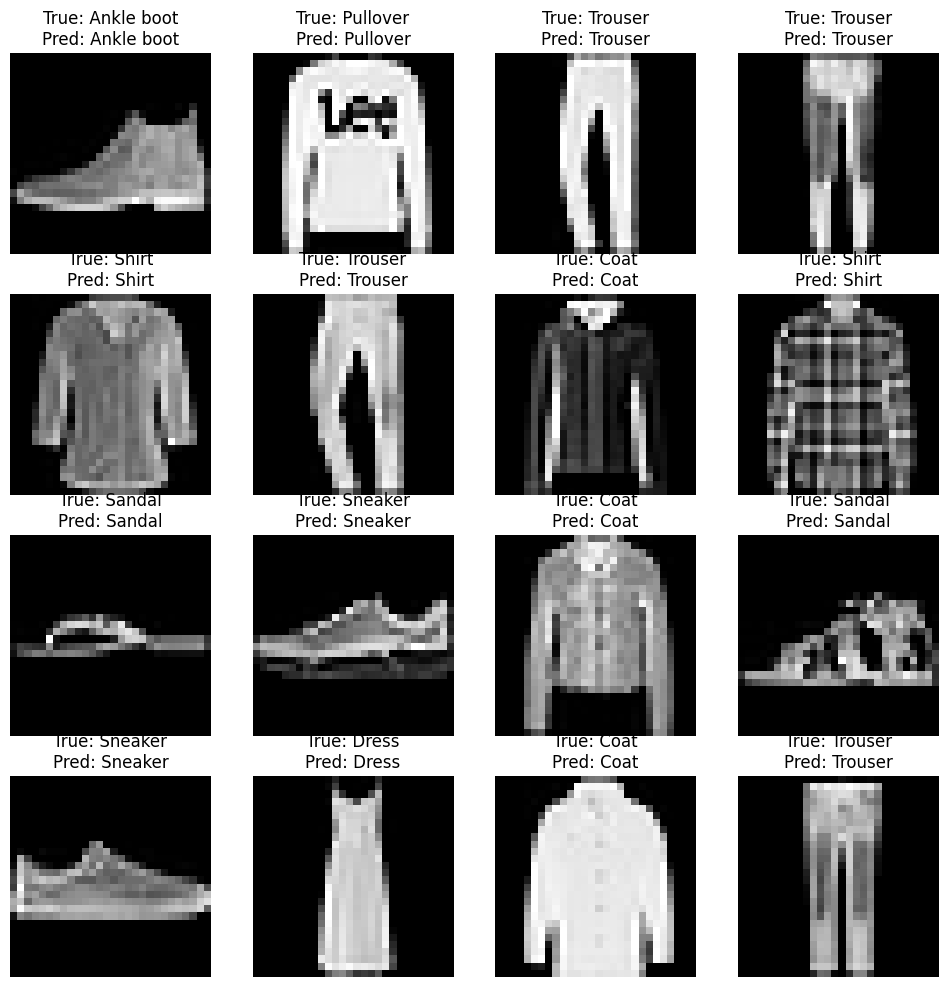

In [13]:
# 4. Estimating the Model’s Performance
# ------------------------------------------------
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()

# Display a few images from the test set with their true and predicted labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Map Fashion MNIST classes to readable labels
fashion_labels = [
    'top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Display a few test images with their predicted and true labels
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {fashion_labels[y_test[i]]}\nPred: {fashion_labels[y_pred_classes[i]]}')
    plt.axis('off')
plt.show()


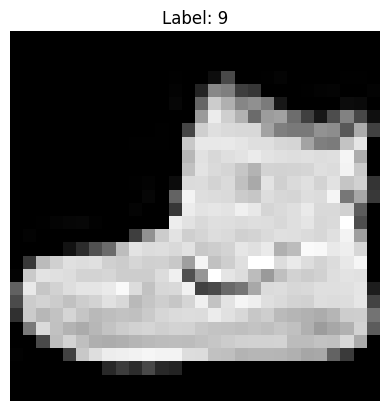

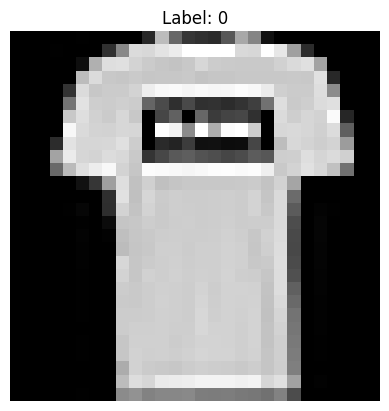

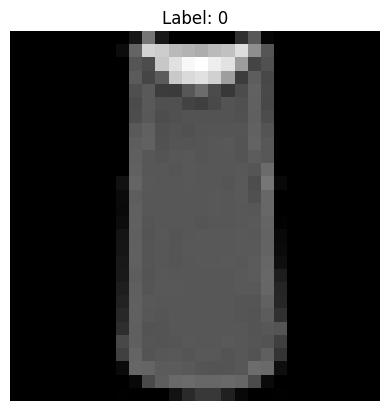

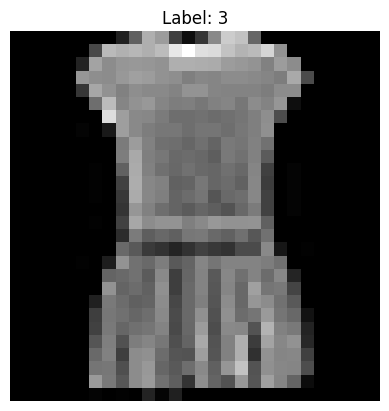

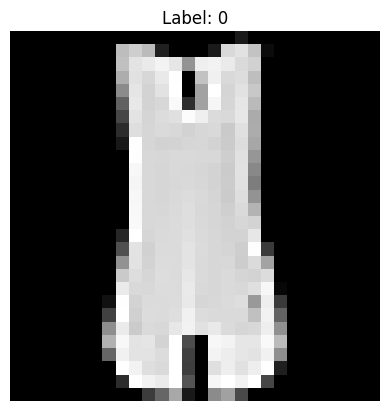

In [12]:
import matplotlib.pyplot as plt

# Display the first 5 images in x_train and their corresponding labels in y_train
for i in range(5):
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()
